<h1> Simple Regression Techniques </h1>

In [3]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import yfinance as fin
import datetime as dt
import quandl as qdl
import os
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()

<h4> Get data for SPY and GOOG </h4>

In [4]:
stocks = "GOOG SPY".split()
start = dt.date.today()-dt.timedelta(365)

In [5]:
data = fin.Tickers(stocks)
data_hist = pd.DataFrame(data.history(start=start)['Close'])
data_hist.head()

[*********************100%***********************]  2 of 2 completed


,GOOG,SPY
Date,,
2022-01-31 00:00:00-05:00,135.698502,442.727509
2022-02-01 00:00:00-05:00,137.878494,445.718994
2022-02-02 00:00:00-05:00,148.036499,450.048706
2022-02-03 00:00:00-05:00,142.650497,439.470337
2022-02-04 00:00:00-05:00,143.016006,441.536804


In [6]:
returns = (np.log(data_hist).diff()).dropna()
returns.head()

,GOOG,SPY
Date,,
2022-02-01 00:00:00-05:00,0.015937,0.006734
2022-02-02 00:00:00-05:00,0.071086,0.009667
2022-02-03 00:00:00-05:00,-0.037061,-0.023786
2022-02-04 00:00:00-05:00,0.002559,0.004691
2022-02-07 00:00:00-05:00,-0.028929,-0.003214


<h6>  </h6>

<h5> Calculating the correlation between Google and the S&P. </h5>

In [8]:
samp = returns.corr()
sample = returns.sample(60).corr()
sample

,GOOG,SPY
GOOG,1.000000,0.869069
SPY,0.869069,1.000000


<ul>
    <li> We can see that the S&P and Google are strongly correlated.  </li>
    <li> Looking at the correlations there is a question that arises. Since, Google is so large as a company and highly correlated to S&P, is it Google that is driving the S&P or vice-versa?  </li>
    <li> This question may not be that easily answered though. </li>
</ul>

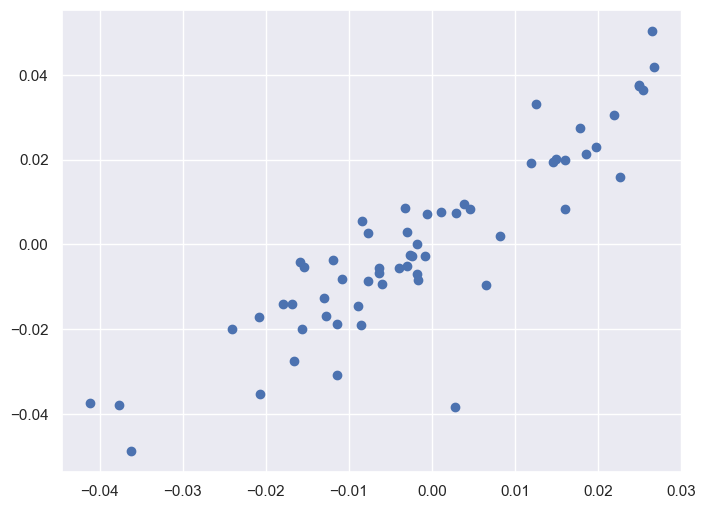

In [9]:
n_sample = returns.sample(60)
plt.scatter(x=n_sample['SPY'], y=n_sample['GOOG'])

<ul>
    <li> Now we would run some statistical tests to make sure this linear relationship is a good one to model. </li>
    <li> We are going to fit the linear model. </li>
</ul>

In [10]:
regr = np.polyfit(n_sample['SPY'], n_sample['GOOG'], deg = 1)
regr

array([1.19496021, 0.00157512])